In [1]:
import pandas as pd
import numpy as np

In [69]:
df = pd.read_excel('../data/processed/revenue and profit margin.xlsx')

In [97]:
df.iloc[:, 1:] = df.iloc[:, 1:].apply(lambda col: col.astype(str).str.replace(r'[,\s]', '', regex=True)).apply(pd.to_numeric, errors='coerce')

In [98]:
# Replace NaN with an empty string
df.iloc[:, 1:] = df.iloc[:, 1:].where(df.iloc[:, 1:].notna(), '')

In [88]:
print(df)

                                (Dollars in millions)     2024     2023  \
0                                            Revenues                     
1                                     Automotivesales  72480.0  78509.0   
2                         Automotiveregulatorycredits   2763.0   1790.0   
3                                   Automotiveleasing   1827.0   2120.0   
4                             Totalautomotiverevenues  77070.0  82419.0   
5                          Energygenerationandstorage  10086.0   6035.0   
6                                    Servicesandother  10534.0   8319.0   
7                                       Totalrevenues  97690.0  96773.0   
9                                           Netincome   7153.0  14974.0   
10  Netincome(loss)attributabletononcontrollingint...     62.0    -23.0   
11          Netincomeattributabletocommonstockholders   7091.0  14997.0   

       2022     2021     2020  
0                              
1   67210.0  44125.0  26184.0  
2  

DataFrame column names: ['(Dollars in millions)', 2024, 2023, 2022, 2021, 2020]
Column data type: object

Year column name: [2024, 2023, 2022, 2021, 2020]
List of years: ['2024', '2023', '2022', '2021', '2020']


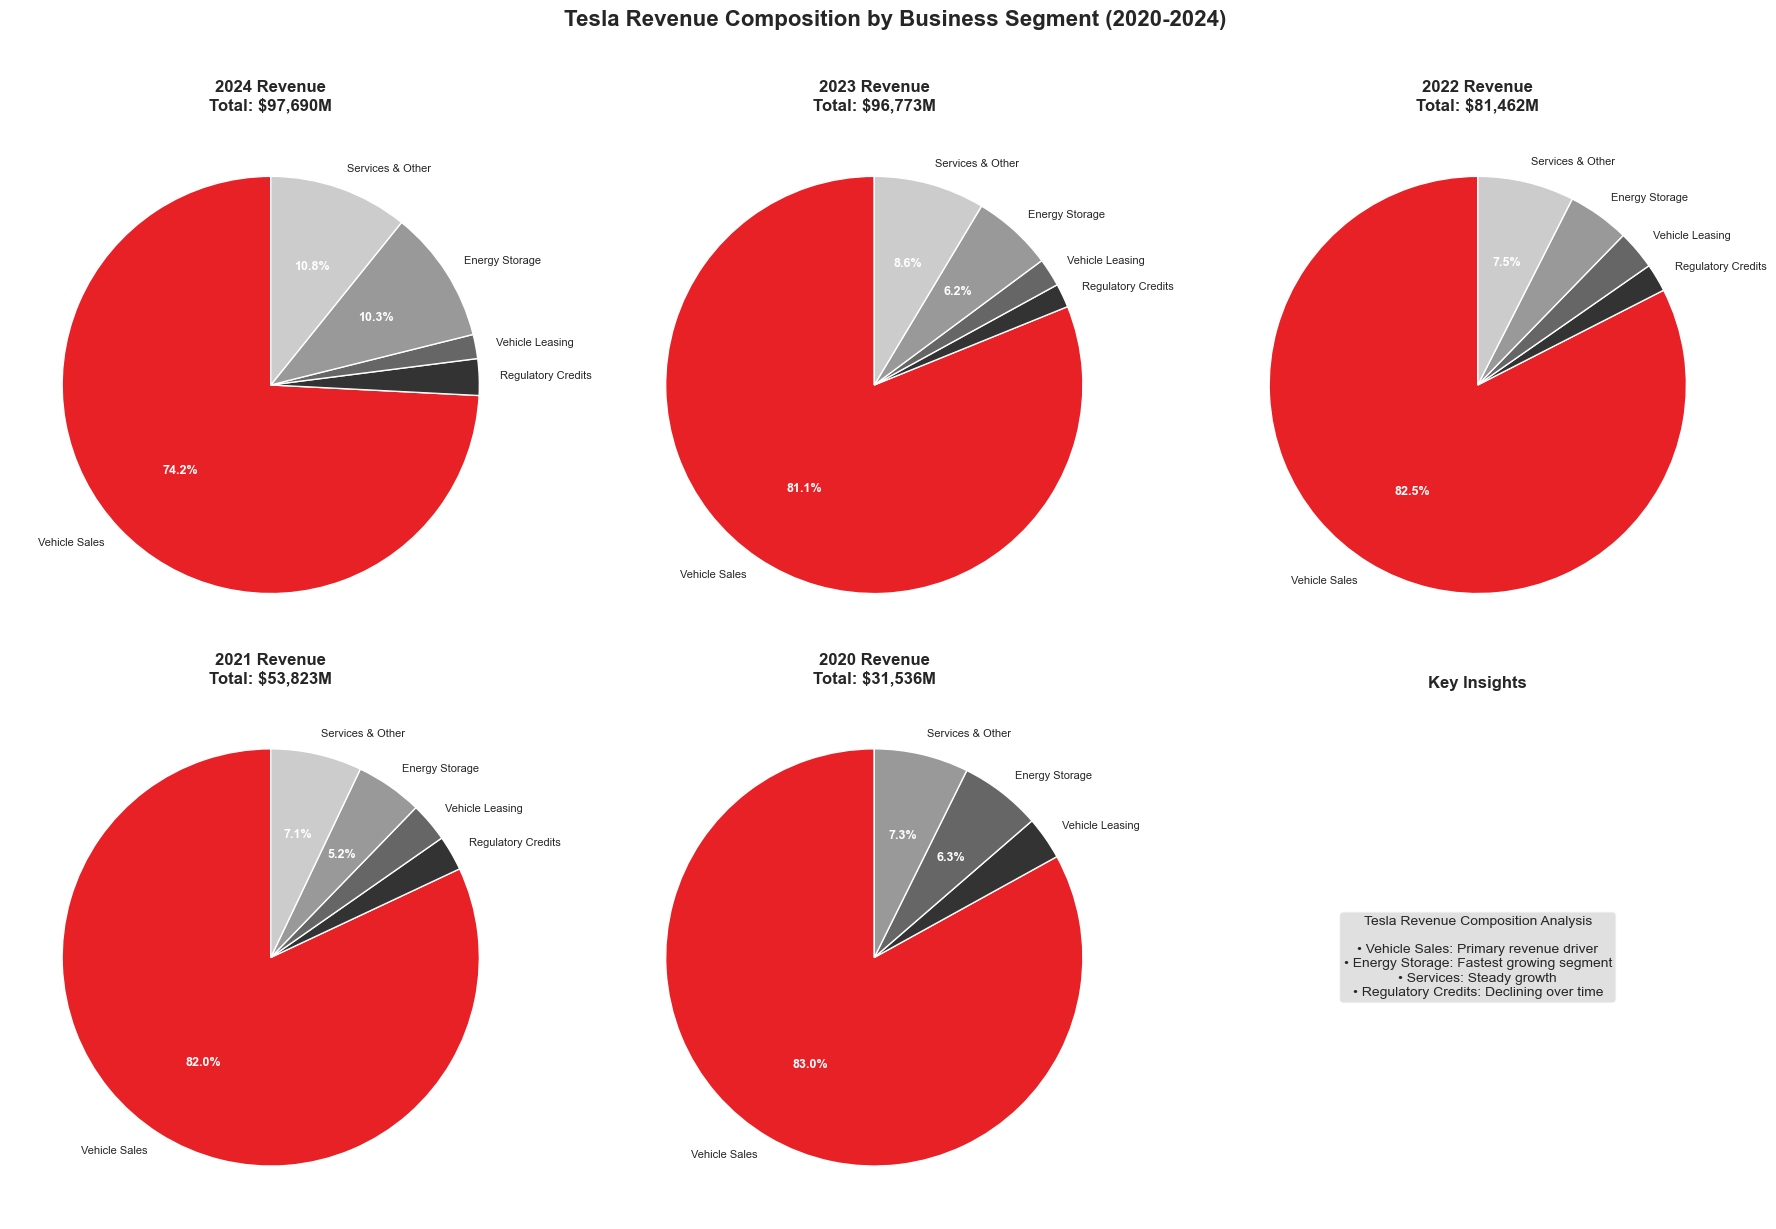

Business Segment Trend Analysis (Business Segment Trend Analysis)

Revenue trends of each business segment (Revenue Trends by Segment, in Millions USD):
                       2024     2023     2022     2021     2020
Vehicle Sales       72480.0  78509.0  67210.0  44125.0  26184.0
Regulatory Credits   2763.0   1790.0   1776.0   1465.0      0.0
Vehicle Leasing      1827.0   2120.0   2476.0   1642.0   1052.0
Energy Storage      10086.0   6035.0   3909.0   2789.0   1994.0
Services & Other    10534.0   8319.0   6091.0   3802.0   2306.0


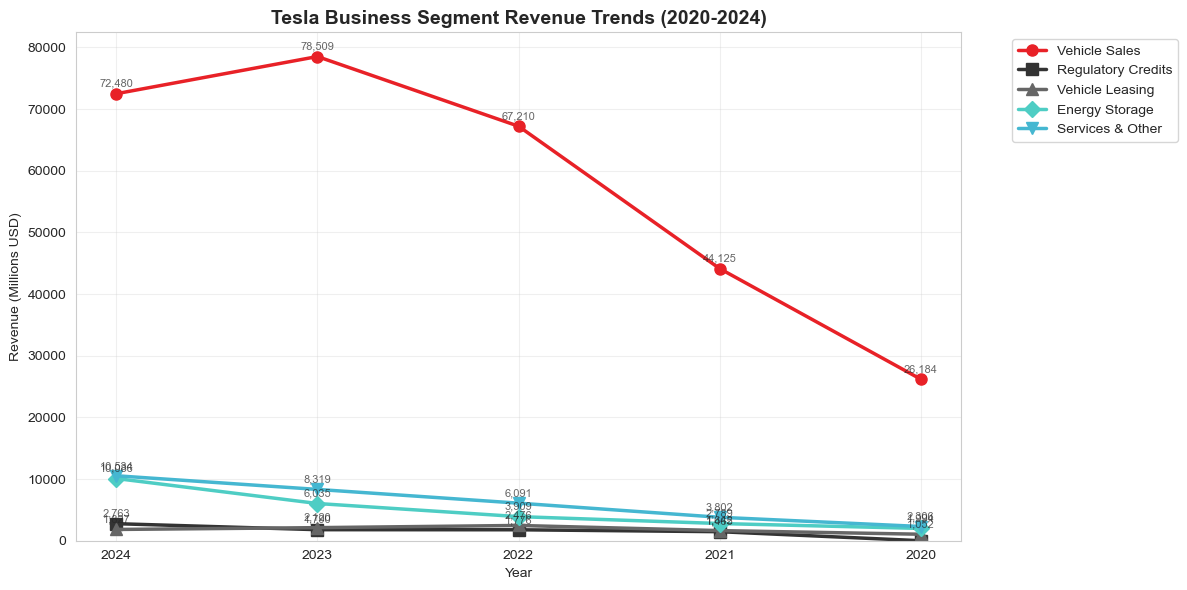


Analysis of compound annual growth rate of business segments (Segment CAGR Analysis)

Compound annual growth rate of each business segment (CAGR by Segment 2024-2020):
                     2024     2020  CAGR (%)  Growth (x)
Vehicle Leasing    1827.0   1052.0    -12.89        0.58
Vehicle Sales     72480.0  26184.0    -22.47        0.36
Services & Other  10534.0   2306.0    -31.60        0.22
Energy Storage    10086.0   1994.0    -33.32        0.20

Annual Analysis of Business Composition Changes (Year-over-Year Composition Change)

Revenue share by business segment (%) (Revenue Share by Segment %):
      Vehicle Sales  Regulatory Credits  Vehicle Leasing  Energy Storage  \
2024          74.19                2.83             1.87           10.32   
2023          81.13                1.85             2.19            6.24   
2022          82.50                2.18             3.04            4.80   
2021          81.98                2.72             3.05            5.18   
2020        

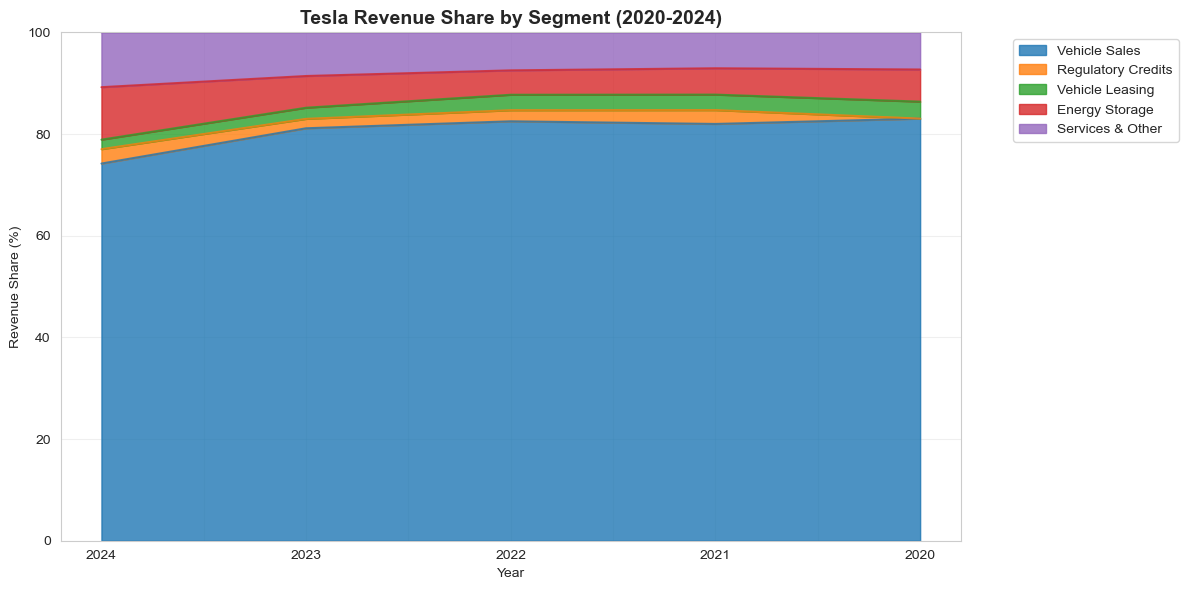


The detailed analysis results have been saved to: ../data/processed/tesla_revenue_composition_analysis.xlsx


In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

# Set English labels to avoid font issues
plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
sns.set_style("whitegrid")

# Read data
df = pd.read_excel('../data/processed/revenue and profit margin.xlsx')

# View column names
print("DataFrame column names:", df.columns.tolist())
print("Column data type:", df.columns.dtype)

# Clean the data
def clean_numeric_series(series):
    return pd.to_numeric(
        series.astype(str).str.replace(r'[,\s]', '', regex=True), 
        errors='coerce'
    )

for col in df.columns[1:]:
    df[col] = clean_numeric_series(df[col])

# Get the actual year column names (starting from the second column)
year_columns = df.columns[1:].tolist()
print(f"\nYear column name: {year_columns}")
years = [str(col) for col in year_columns]  # Convert to string
print(f"List of years: {years}")

# Define business segments and display names
business_sectors = [
    'Automotivesales',
    'Automotiveregulatorycredits',
    'Automotiveleasing',
    'Energygenerationandstorage',
    'Servicesandother'
]

sector_display_names = {
    'Automotivesales': 'Vehicle Sales',
    'Automotiveregulatorycredits': 'Regulatory Credits',
    'Automotiveleasing': 'Vehicle Leasing',
    'Energygenerationandstorage': 'Energy Storage',
    'Servicesandother': 'Services & Other'
}

# Create 5 pie charts - separated by year
fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # 2行3列，最后一个位置留空
fig.suptitle('Tesla Revenue Composition by Business Segment (2020-2024)', 
             fontsize=16, fontweight='bold', y=1.02)

# Used to store data for all years for subsequent analysis
yearly_composition = {}

for idx, year_col in enumerate(year_columns):
    year_str = str(year_col)
    
    # Confirm the subgraph position
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]
    
    sector_labels = []
    sector_values = []
    sector_colors = []
    
    # Obtain the total revenue for that year
    total_revenue_row = df[df['(Dollars in millions)'].astype(str).str.contains('Totalrevenues', na=False)]
    if not total_revenue_row.empty:
        # Use the actual column name
        total_revenue = total_revenue_row.iloc[0][year_col]
    else:
        total_revenue = 0
    
    # Collect data from various business segments
    for sector in business_sectors:
        sector_mask = df['(Dollars in millions)'].astype(str).str.contains(sector, na=False, case=False)
        sector_row = df[sector_mask]
        
        if not sector_row.empty:
            # Use the actual column name
            sector_value = sector_row.iloc[0][year_col]
            if pd.notna(sector_value) and sector_value > 0:
                sector_labels.append(sector_display_names.get(sector, sector))
                sector_values.append(sector_value)
    
    # Add an 'Other/Unknown' category (if there is total revenue but incomplete business segment data)
    if total_revenue > 0 and len(sector_values) > 0:
        sum_sector_values = sum(sector_values)
        if sum_sector_values < total_revenue * 0.95:  # If the total of the business segment data is less than 95% of the total revenue
            other_value = total_revenue - sum_sector_values
            if other_value > 0:
                sector_labels.append('Other/Unknown')
                sector_values.append(other_value)
    
    # Colour scheme (Tesla brand colours and extended colours)
    base_colors = ['#E82127', '#333333', '#666666', '#999999', '#CCCCCC', '#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']
    sector_colors = base_colors[:len(sector_values)]
    
    if sector_values and total_revenue > 0:
        # Draw a pie chart
        wedges, texts, autotexts = ax.pie(
            sector_values,
            labels=sector_labels if len(sector_labels) <= 6 else None,  # Do not display when there are too many tags
            colors=sector_colors,
            autopct=lambda pct: f'{pct:.1f}%' if pct >= 5 else '',  # Only display percentages greater than 5%
            startangle=90,
            textprops={'fontsize': 8}
        )
        
        # Set title
        ax.set_title(f'{year_str} Revenue\nTotal: ${total_revenue:,.0f}M', 
                    fontsize=12, fontweight='bold', pad=10)
        
        # Beautify percentage display
        for autotext in autotexts:
            autotext.set_color('white')
            autotext.set_fontweight('bold')
            autotext.set_fontsize(9)
        
        # Add a legend if there are too many labels
        if len(sector_labels) > 6:
            ax.legend(wedges, sector_labels, title="Segments", 
                     loc="center left", bbox_to_anchor=(1, 0, 0.5, 1),
                     fontsize=8)
        
        # Store data for subsequent analysis
        yearly_composition[year_str] = {
            'labels': sector_labels,
            'values': sector_values,
            'total': total_revenue
        }
    else:
        ax.text(0.5, 0.5, f'No data for {year_str}', 
               ha='center', va='center', fontsize=12)
        ax.set_title(f'{year_str}', fontsize=12, fontweight='bold')
    
    # Set the aspect ratio to 1 to make the pie chart circular
    ax.set_aspect('equal')

# Hide redundant subgraphs
total_plots = len(year_columns)
for idx in range(total_plots, 6):
    row = idx // 3
    col = idx % 3
    axes[row, col].axis('off')

# Add summary information at the last position
if total_plots < 6:
    summary_ax = axes[1, 2]
    summary_text = "Tesla Revenue Composition Analysis\n\n"
    summary_text += "• Vehicle Sales: Primary revenue driver\n"
    summary_text += "• Energy Storage: Fastest growing segment\n"
    summary_text += "• Services: Steady growth\n"
    summary_text += "• Regulatory Credits: Declining over time"

    summary_ax.text(0.5, 0.5, summary_text, 
                    ha='center', va='center', fontsize=10,
                    transform=summary_ax.transAxes,
                    bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray", alpha=0.7))
    summary_ax.set_title('Key Insights', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# 2. Additional Analysis: Trends of Each Business Segment (Line Chart)
print("=" * 80)
print("Business Segment Trend Analysis (Business Segment Trend Analysis)")
print("=" * 80)

# Extract annual data for each business segment
segment_trends = {}
for sector in business_sectors:
    sector_mask = df['(Dollars in millions)'].astype(str).str.contains(sector, na=False, case=False)
    sector_row = df[sector_mask]
    
    if not sector_row.empty:
        sector_data = {}
        for year_col in year_columns:
            value = sector_row.iloc[0][year_col]
            sector_data[str(year_col)] = value if pd.notna(value) else 0
        
        segment_trends[sector_display_names.get(sector, sector)] = sector_data

# Create trend DataFrame
trend_df = pd.DataFrame(segment_trends).T
print("\nRevenue trends of each business segment (Revenue Trends by Segment, in Millions USD):")
print(trend_df)

# Draw a trend chart
if not trend_df.empty:
    fig2, ax2 = plt.subplots(figsize=(12, 6))
    
    # Draw a line chart for each business segment
    markers = ['o', 's', '^', 'D', 'v', 'p', '*', 'X']
    colors = ['#E82127', '#333333', '#666666', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#FF6B6B']
    
    for i, (segment, color) in enumerate(zip(trend_df.index, colors[:len(trend_df)])):
        ax2.plot(years, trend_df.loc[segment].values, 
                 marker=markers[i % len(markers)], 
                 linewidth=2.5, 
                 markersize=8,
                 color=color,
                 label=segment)
    
    ax2.set_title('Tesla Business Segment Revenue Trends (2020-2024)', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Year')
    ax2.set_ylabel('Revenue (Millions USD)')
    ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax2.grid(True, alpha=0.3)
    ax2.set_ylim(bottom=0)
    
    # Add numeric labels
    for segment in trend_df.index:
        for i, year in enumerate(years):
            value = trend_df.loc[segment, year]
            if value > 0:  # Show only non-zero values
                ax2.text(i, value + (max(trend_df.max()) * 0.01), 
                        f'{value:,.0f}', 
                        ha='center', va='bottom', fontsize=8, alpha=0.7)
    
    plt.tight_layout()
    plt.show()

# 3. Calculate the compound annual growth rate of each business segment
print("\n" + "=" * 80)
print("Analysis of compound annual growth rate of business segments (Segment CAGR Analysis)")
print("=" * 80)

if len(years) >= 2:
    first_year = years[0]
    last_year = years[-1]
    
    cagr_analysis = {}
    for segment, data in segment_trends.items():
        if first_year in data and last_year in data:
            start_value = data[first_year]
            end_value = data[last_year]
            if start_value > 0 and end_value > 0:
                years_diff = len(years) - 1
                cagr = ((end_value / start_value) ** (1/years_diff) - 1) * 100
                cagr_analysis[segment] = {
                    first_year: start_value,
                    last_year: end_value,
                    'CAGR (%)': round(cagr, 2),
                    'Growth (x)': round(end_value / start_value, 2)
                }
    
    # Create CAGR analysis DataFrame
    if cagr_analysis:
        cagr_df = pd.DataFrame(cagr_analysis).T
        print(f"\nCompound annual growth rate of each business segment (CAGR by Segment {first_year}-{last_year}):")
        print(cagr_df.sort_values('CAGR (%)', ascending=False))
    else:
        print("Cannot calculate CAGR: missing start or end year data")
else:
    print("Insufficient annual data to calculate CAGR")

# 4. Analysis of changes in business composition over the years
print("\n" + "=" * 80)
print("Annual Analysis of Business Composition Changes (Year-over-Year Composition Change)")
print("=" * 80)

# Calculate the annual proportion of each business segment
composition_df = pd.DataFrame(index=years)

for sector in business_sectors:
    sector_mask = df['(Dollars in millions)'].astype(str).str.contains(sector, na=False, case=False)
    sector_row = df[sector_mask]
    
    if not sector_row.empty:
        segment_name = sector_display_names.get(sector, sector)
        percentages = []
        for year_col in year_columns:
            sector_value = sector_row.iloc[0][year_col]
            total_revenue = total_revenue_row.iloc[0][year_col]
            if pd.notna(sector_value) and pd.notna(total_revenue) and total_revenue > 0:
                percentage = (sector_value / total_revenue * 100)
            else:
                percentage = 0
            percentages.append(round(percentage, 2))
        
        composition_df[segment_name] = percentages

print("\nRevenue share by business segment (%) (Revenue Share by Segment %):")
print(composition_df)

# 5. Visualised proportion changes
if not composition_df.empty:
    fig3, ax3 = plt.subplots(figsize=(12, 6))
    
    # Use a stacked area chart to show the change in proportions
    composition_df.plot.area(ax=ax3, alpha=0.8)
    
    ax3.set_title('Tesla Revenue Share by Segment (2020-2024)', fontsize=14, fontweight='bold')
    ax3.set_xlabel('Year')
    ax3.set_ylabel('Revenue Share (%)')
    ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax3.grid(True, alpha=0.3)
    ax3.set_ylim(0, 100)
    
    plt.tight_layout()
    plt.show()

# 6. Save analysis results
try:
    output_path = '../data/processed/tesla_revenue_composition_analysis.xlsx'
    
    with pd.ExcelWriter(output_path, engine='openpyxl') as writer:
        # Save the original business segment data
        segment_data_df = pd.DataFrame(index=years)
        for sector in business_sectors:
            sector_mask = df['(Dollars in millions)'].astype(str).str.contains(sector, na=False, case=False)
            sector_row = df[sector_mask]
            if not sector_row.empty:
                display_name = sector_display_names.get(sector, sector)
                segment_data = []
                for year_col in year_columns:
                    segment_data.append(sector_row.iloc[0][year_col])
                segment_data_df[display_name] = segment_data
        
        segment_data_df.to_excel(writer, sheet_name='Segment_Revenue_Data')
        
        # Save Proportion Analysis
        composition_df.to_excel(writer, sheet_name='Revenue_Share_Analysis')
        
        # Save CAGR analysis (if any)
        if 'cagr_df' in locals() and not cagr_df.empty:
            cagr_df.to_excel(writer, sheet_name='CAGR_Analysis')
        
        # Save trend data
        if not trend_df.empty:
            trend_df.to_excel(writer, sheet_name='Revenue_Trends')
        
        # Save the original data (after cleaning)
        df.to_excel(writer, sheet_name='Raw_Data_Cleaned', index=False)
    
    print(f"\nThe detailed analysis results have been saved to: {output_path}")
    
except Exception as e:
    print(f"\nError saving file: {e}")